In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_1000_posix = pd.read_csv('./results_1000_posix.csv')
df_1000_open_mp_static = pd.read_csv('./results_1000_openmp_static.csv')
df_1000_posix.head()

,num_threads,run,real_time
0,1,1,7.43
1,1,2,6.71
2,1,3,7.10
3,1,4,6.92
4,1,5,6.57


In [18]:
df_1000_open_mp_static.head()



,num_threads,run,real_time
0,1,1,2.64
1,1,2,2.97
2,1,3,2.81
3,1,4,2.56
4,1,5,2.56


In [19]:
# Compute grouped statistics
grouped_1000_posix = df_1000_posix.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_posix

,num_threads,mean,std
0,1,6.763,0.310449
1,2,4.612,0.057310
2,3,4.037,0.033682
3,4,3.817,0.156635
4,5,4.008,0.145281
5,6,3.860,0.042947
6,7,3.904,0.087203
7,8,3.918,0.052662
8,9,3.970,0.119629
9,10,3.864,0.078768


In [20]:

grouped_1000_open_mp = df_1000_open_mp_static.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_open_mp

,num_threads,mean,std
0,1,2.702,0.193781
1,2,1.338,0.039665
2,3,1.034,0.299043
3,4,0.858,0.059404
4,5,0.870,0.032998
5,6,0.870,0.101980
6,7,0.734,0.050376
7,8,0.680,0.027889
8,9,0.715,0.022730
9,10,0.724,0.045995


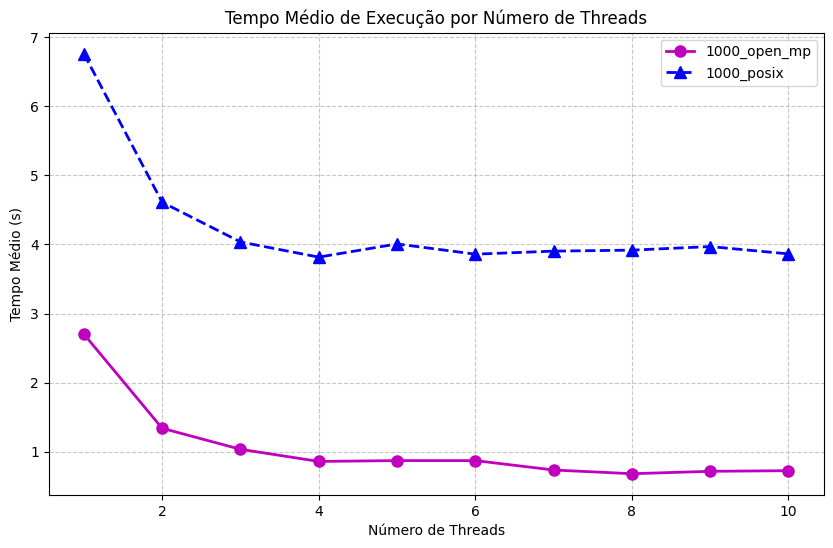

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_1000_open_mp['num_threads'], grouped_1000_open_mp['mean'],
         'mo-', linewidth=2, markersize=8, label='1000_open_mp')
plt.plot(grouped_1000_posix['num_threads'], grouped_1000_posix['mean'],
         'b--', marker='^', linewidth=2, markersize=8, label='1000_posix')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Tempo Médio de Execução por Número de Threads')
plt.grid(True, linestyle='--', alpha=0.7)


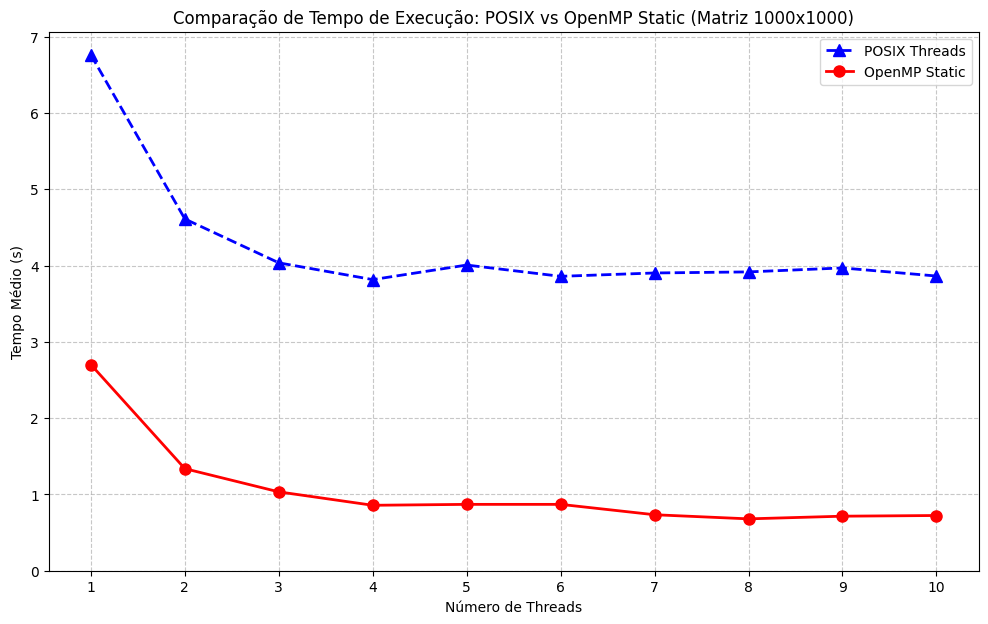

In [22]:
# Comparison graph between POSIX and OpenMP Static implementations for 1000x1000 matrices
# Compute grouped statistics for both implementations
grouped_posix = df_1000_posix.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_openmp = df_1000_open_mp_static.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()

# Create the comparison plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_posix['num_threads'], grouped_posix['mean'], 'b--', marker='^', linewidth=2, markersize=8, label='POSIX Threads')
plt.plot(grouped_openmp['num_threads'], grouped_openmp['mean'], 'r-', marker='o', linewidth=2, markersize=8, label='OpenMP Static')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Comparação de Tempo de Execução: POSIX vs OpenMP Static (Matriz 1000x1000)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grouped_posix['num_threads'])
plt.ylim(bottom=0)  # Start y-axis at zero
plt.show()


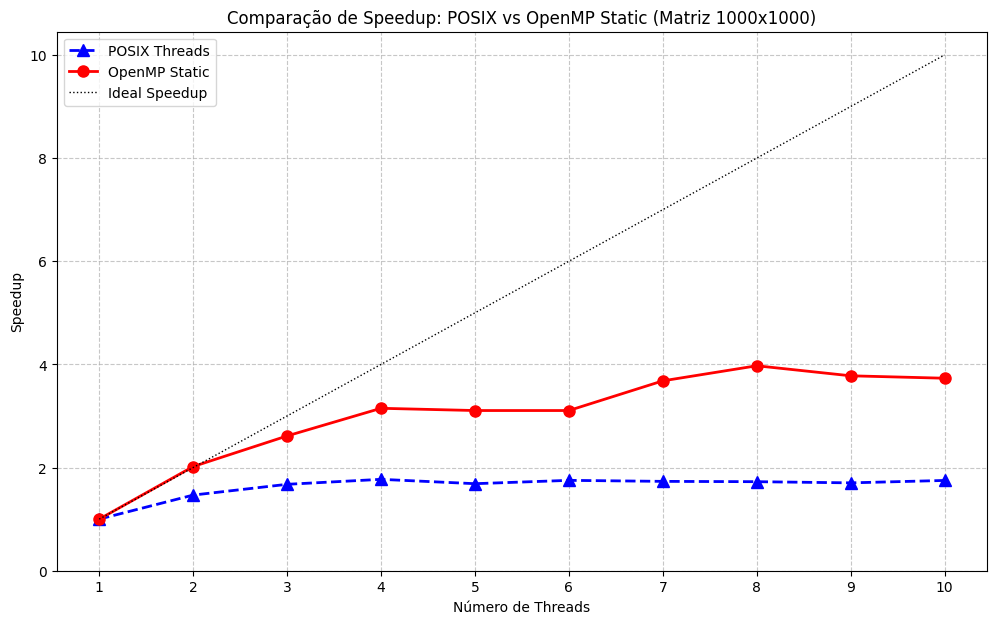

In [23]:
# Speedup comparison graph between POSIX and OpenMP Static implementations
# Calculate speedup for each implementation
speedup_posix = grouped_posix['mean'].iloc[0] / grouped_posix['mean']
speedup_openmp = grouped_openmp['mean'].iloc[0] / grouped_openmp['mean']

# Create the speedup comparison plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_posix['num_threads'], speedup_posix, 'b--', marker='^', linewidth=2, markersize=8, label='POSIX Threads')
plt.plot(grouped_openmp['num_threads'], speedup_openmp, 'r-', marker='o', linewidth=2, markersize=8, label='OpenMP Static')
plt.plot(grouped_posix['num_threads'], grouped_posix['num_threads'], 'k:', linewidth=1, label='Ideal Speedup')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Comparação de Speedup: POSIX vs OpenMP Static (Matriz 1000x1000)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grouped_posix['num_threads'])
plt.ylim(bottom=0)  # Start y-axis at zero
plt.show()


In [24]:
# Summary of comparison between POSIX and OpenMP Static implementations
# Calculate efficiency (speedup / number of threads) for each implementation
efficiency_posix = speedup_posix / grouped_posix['num_threads']
efficiency_openmp = speedup_openmp / grouped_openmp['num_threads']

# Create a summary dataframe
comparison_summary = pd.DataFrame({
    'num_threads': grouped_posix['num_threads'],
    'posix_time': grouped_posix['mean'],
    'openmp_time': grouped_openmp['mean'],
    'posix_speedup': speedup_posix,
    'openmp_speedup': speedup_openmp,
    'posix_efficiency': efficiency_posix,
    'openmp_efficiency': efficiency_openmp,
    'time_ratio': grouped_posix['mean'] / grouped_openmp['mean']
})

# Display the summary
print("Comparação entre implementações POSIX e OpenMP Static para matriz 1000x1000:")
print(comparison_summary)

# Calculate and display average metrics
print("\nMétricas médias (excluindo execução com 1 thread):")
avg_metrics = comparison_summary[comparison_summary['num_threads'] > 1].mean()
print(f"Tempo médio POSIX: {avg_metrics['posix_time']:.2f} segundos")
print(f"Tempo médio OpenMP: {avg_metrics['openmp_time']:.2f} segundos")
print(f"Speedup médio POSIX: {avg_metrics['posix_speedup']:.2f}x")
print(f"Speedup médio OpenMP: {avg_metrics['openmp_speedup']:.2f}x")
print(f"Eficiência média POSIX: {avg_metrics['posix_efficiency']:.2f} (ideal = 1.0)")
print(f"Eficiência média OpenMP: {avg_metrics['openmp_efficiency']:.2f} (ideal = 1.0)")
print(f"Razão média de tempo (POSIX/OpenMP): {avg_metrics['time_ratio']:.2f}x")


Comparação entre implementações POSIX e OpenMP Static para matriz 1000x1000:
   num_threads  posix_time  openmp_time  posix_speedup  openmp_speedup  \
0            1       6.763        2.702       1.000000        1.000000   
1            2       4.612        1.338       1.466392        2.019432   
2            3       4.037        1.034       1.675254        2.613153   
3            4       3.817        0.858       1.771810        3.149184   
4            5       4.008        0.870       1.687375        3.105747   
5            6       3.860        0.870       1.752073        3.105747   
6            7       3.904        0.734       1.732326        3.681199   
7            8       3.918        0.680       1.726136        3.973529   
8            9       3.970        0.715       1.703526        3.779021   
9           10       3.864        0.724       1.750259        3.732044   

   posix_efficiency  openmp_efficiency  time_ratio  
0          1.000000           1.000000    2.502961  
1 